## Settings

In [40]:
setwd("~/git/hist_future_hail/")               # Working directory.
source("modules/gev_functions.R")              # Load helper functions.
variables = c("hailcast_diam_max", "wind_10m") # Variables to process.
results_dir = "/g/data/up6/tr2908/hist_future_hail/results/" # Results directory.
set.seed(42) # Random seed for reproducibility.

## Read in data

In [41]:
all_dat = read_feathers(results_dir = results_dir)

[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_ssp245_block_maxima.feather"


## Timeseries of maxima

First the timeseries of daily hail diameter maxima.

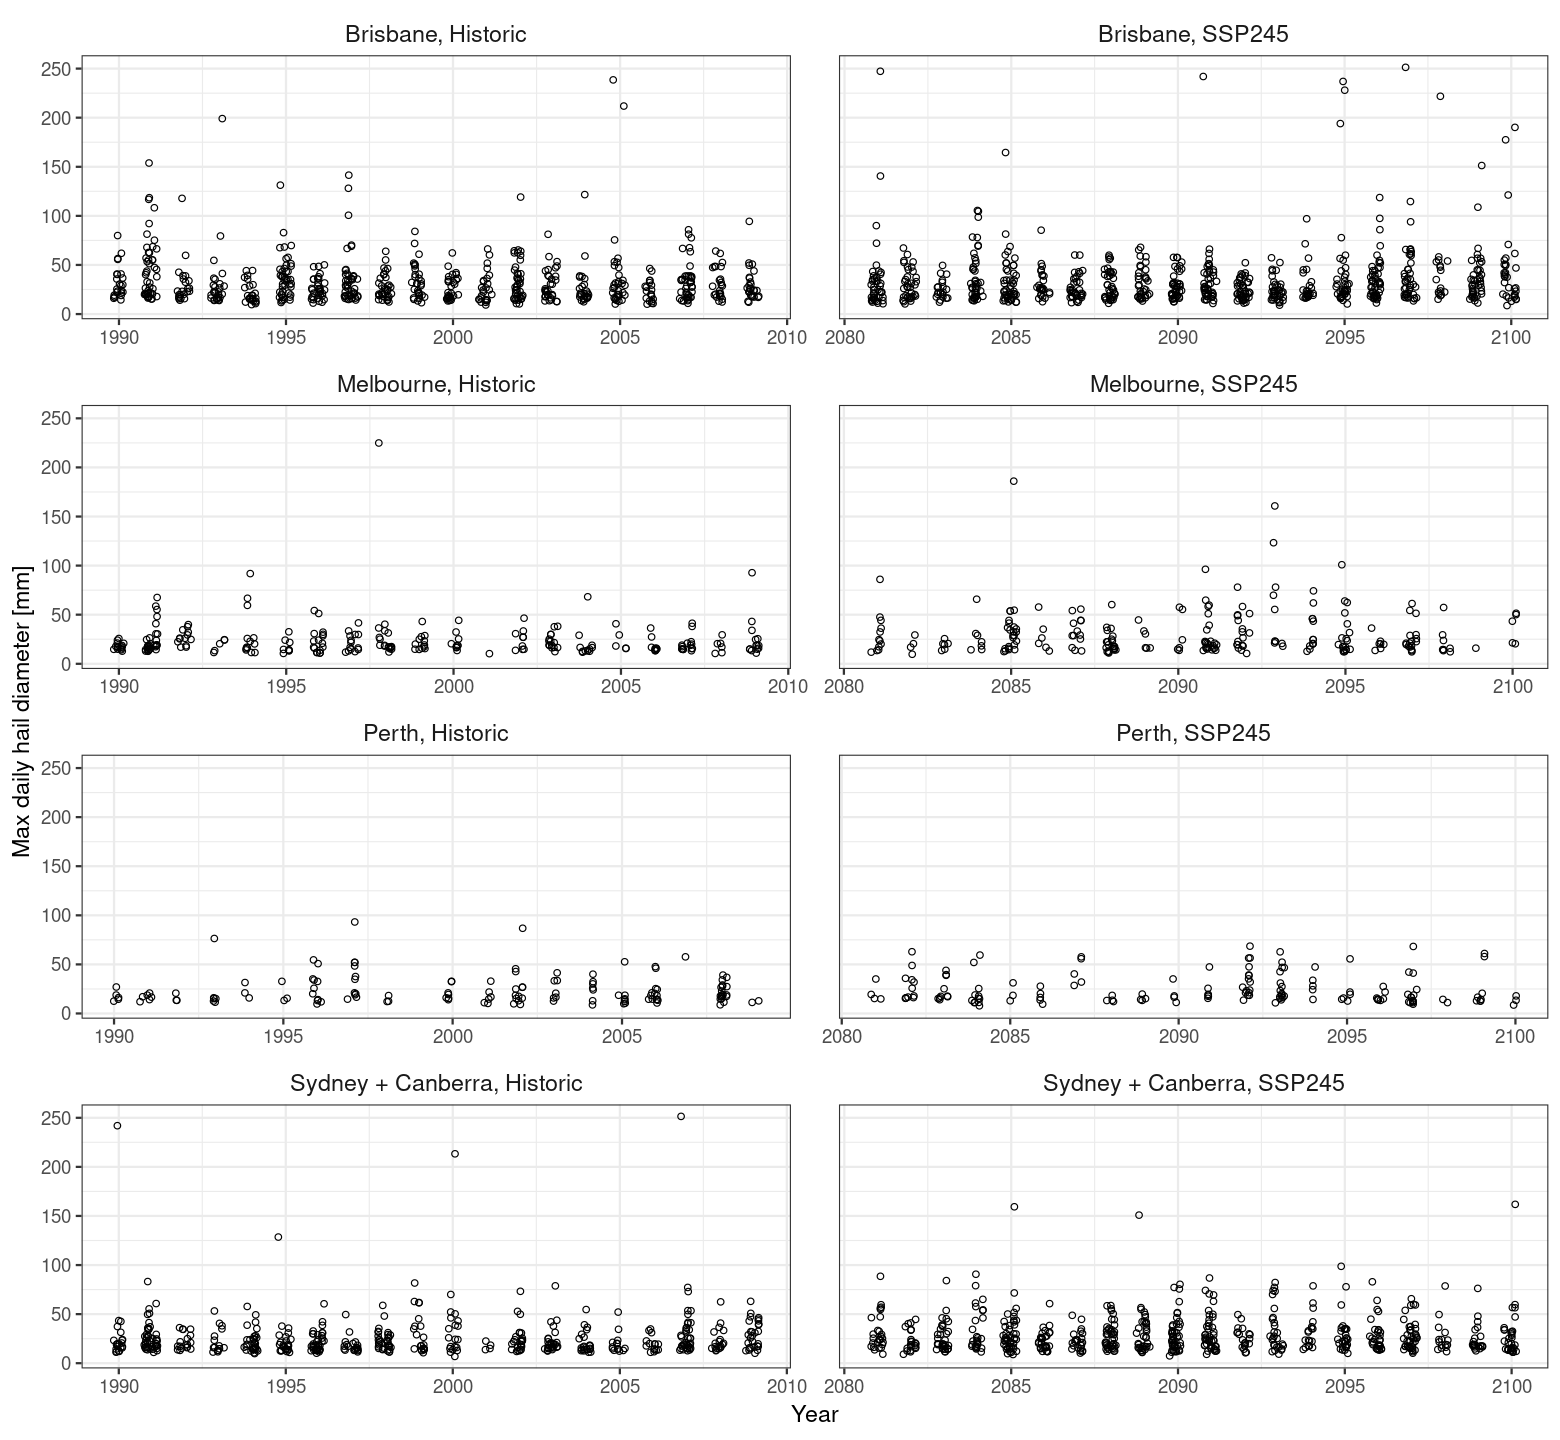

In [42]:
options(repr.plot.width = 13, repr.plot.height = 12)
plot_ts(dat = all_dat, ylabel = "Max daily hail diameter [mm]", var = "hailcast_diam_max")

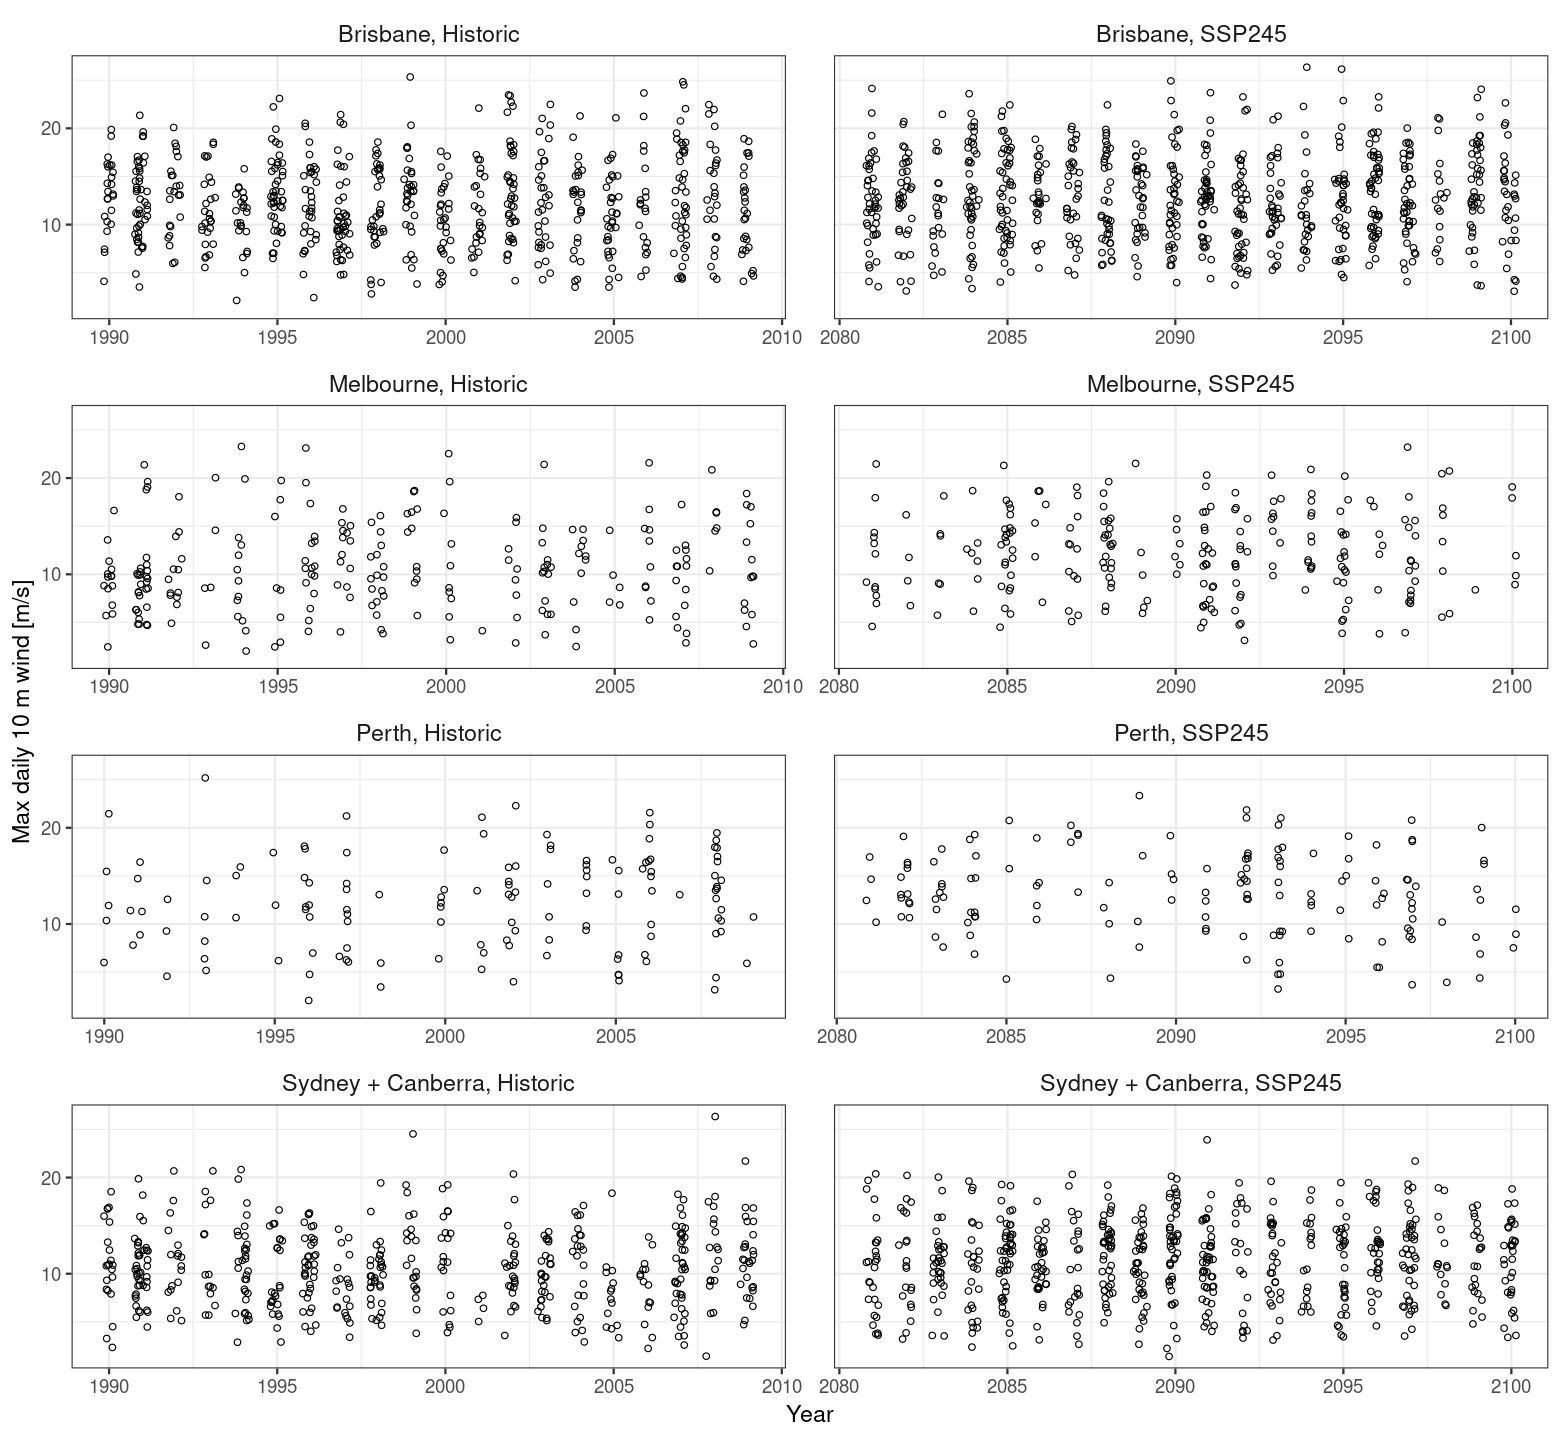

In [43]:
plot_ts(dat = all_dat, ylabel = "Max daily 10 m wind [m/s]", var = "wind_10m")

## GEV fitting

In [46]:
source("modules/gev_functions.R")
gev_fits = fit_gevs(all_dat = all_dat)

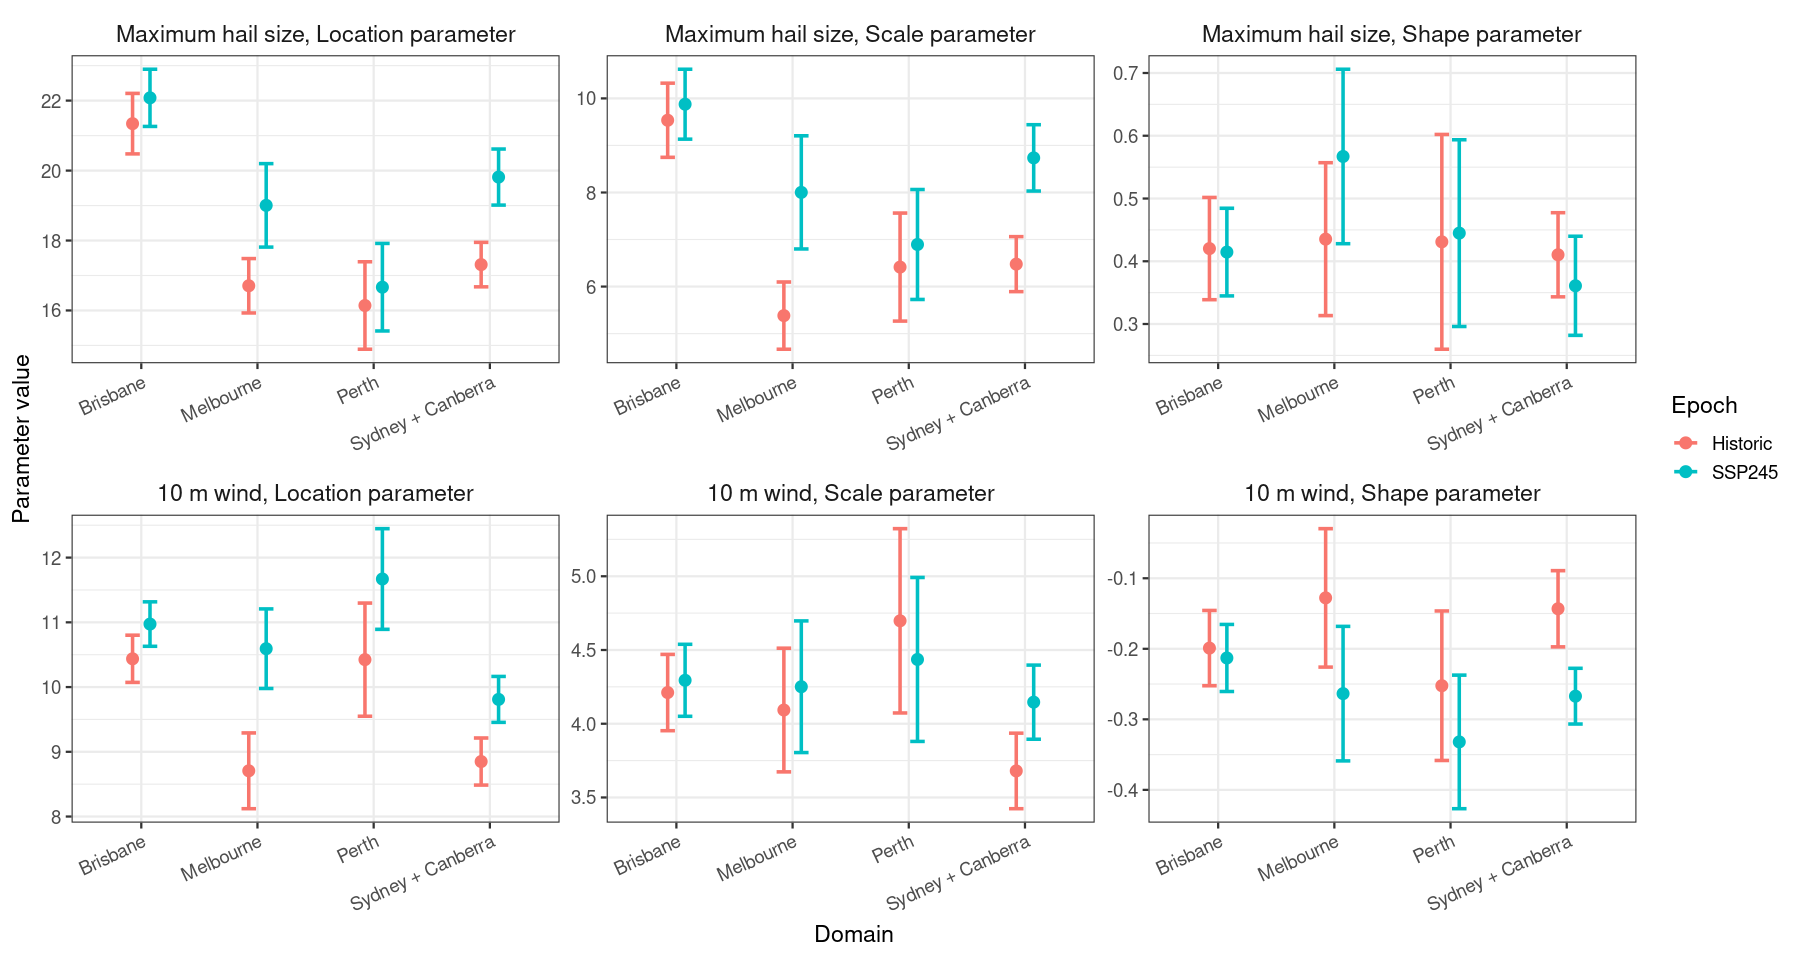

In [47]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_params(gev_fits = gev_fits, file = "paper/figures/fit_params.pdf")

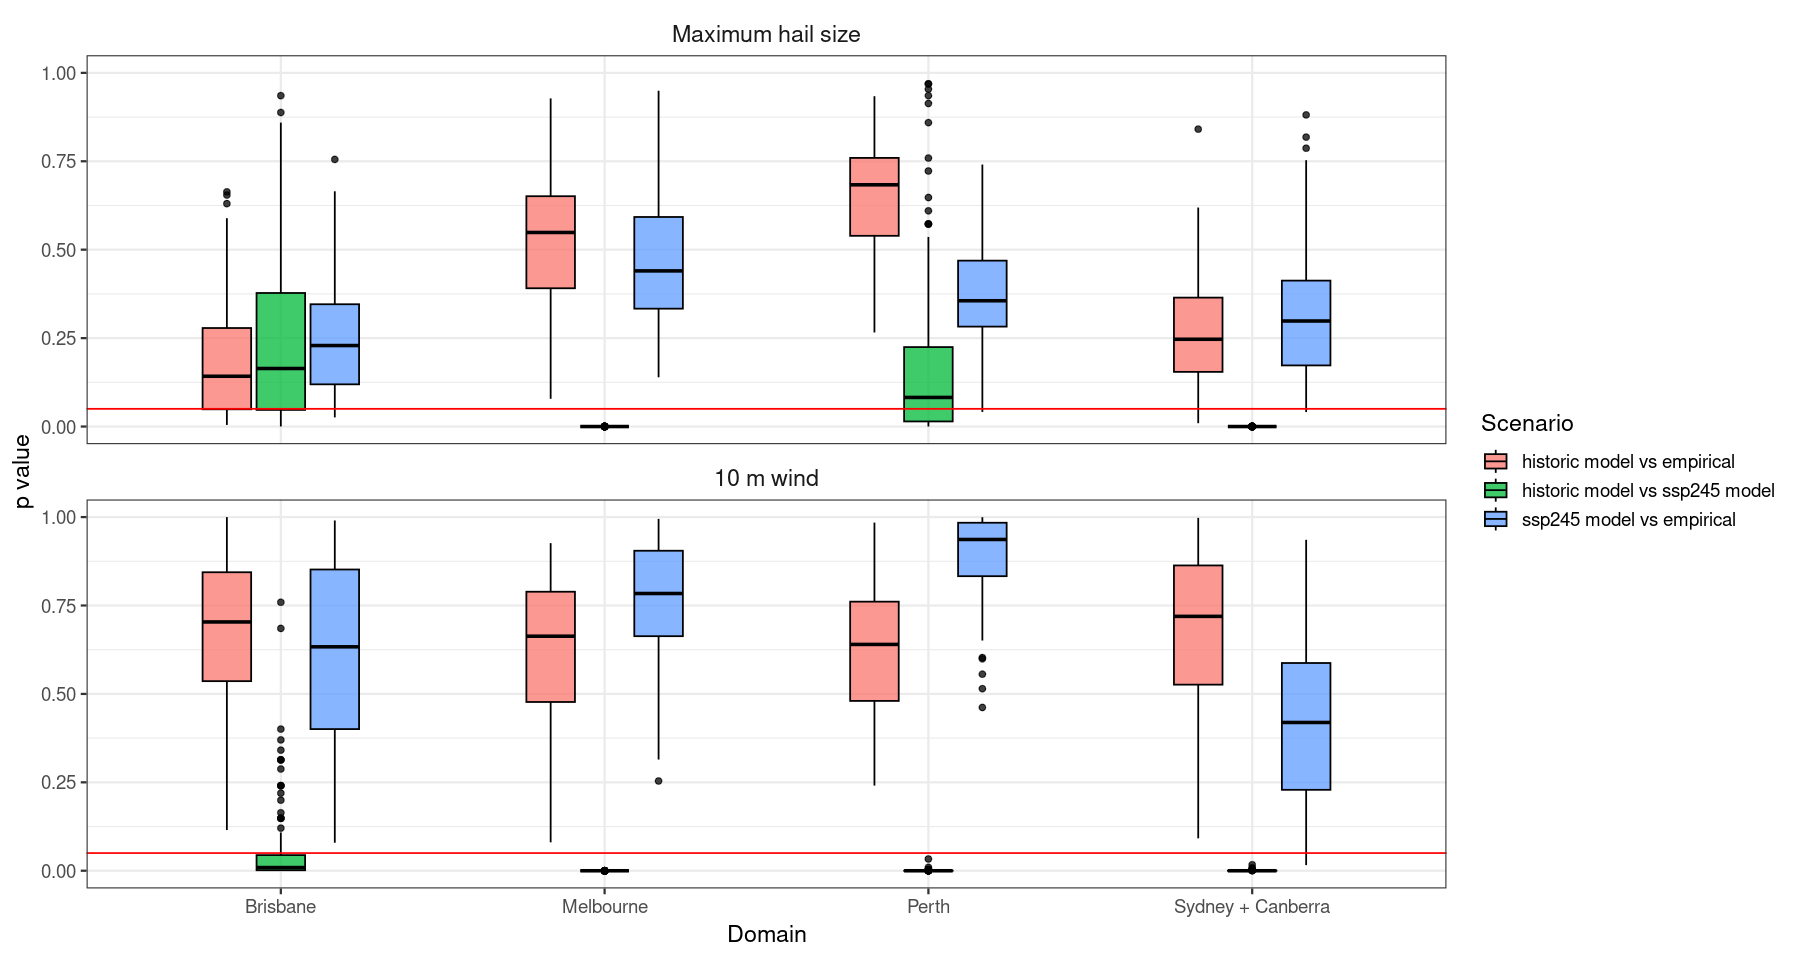

In [48]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_ks_fits(gev_fits = gev_fits, file = "paper/figures/fit_pvals.pdf")

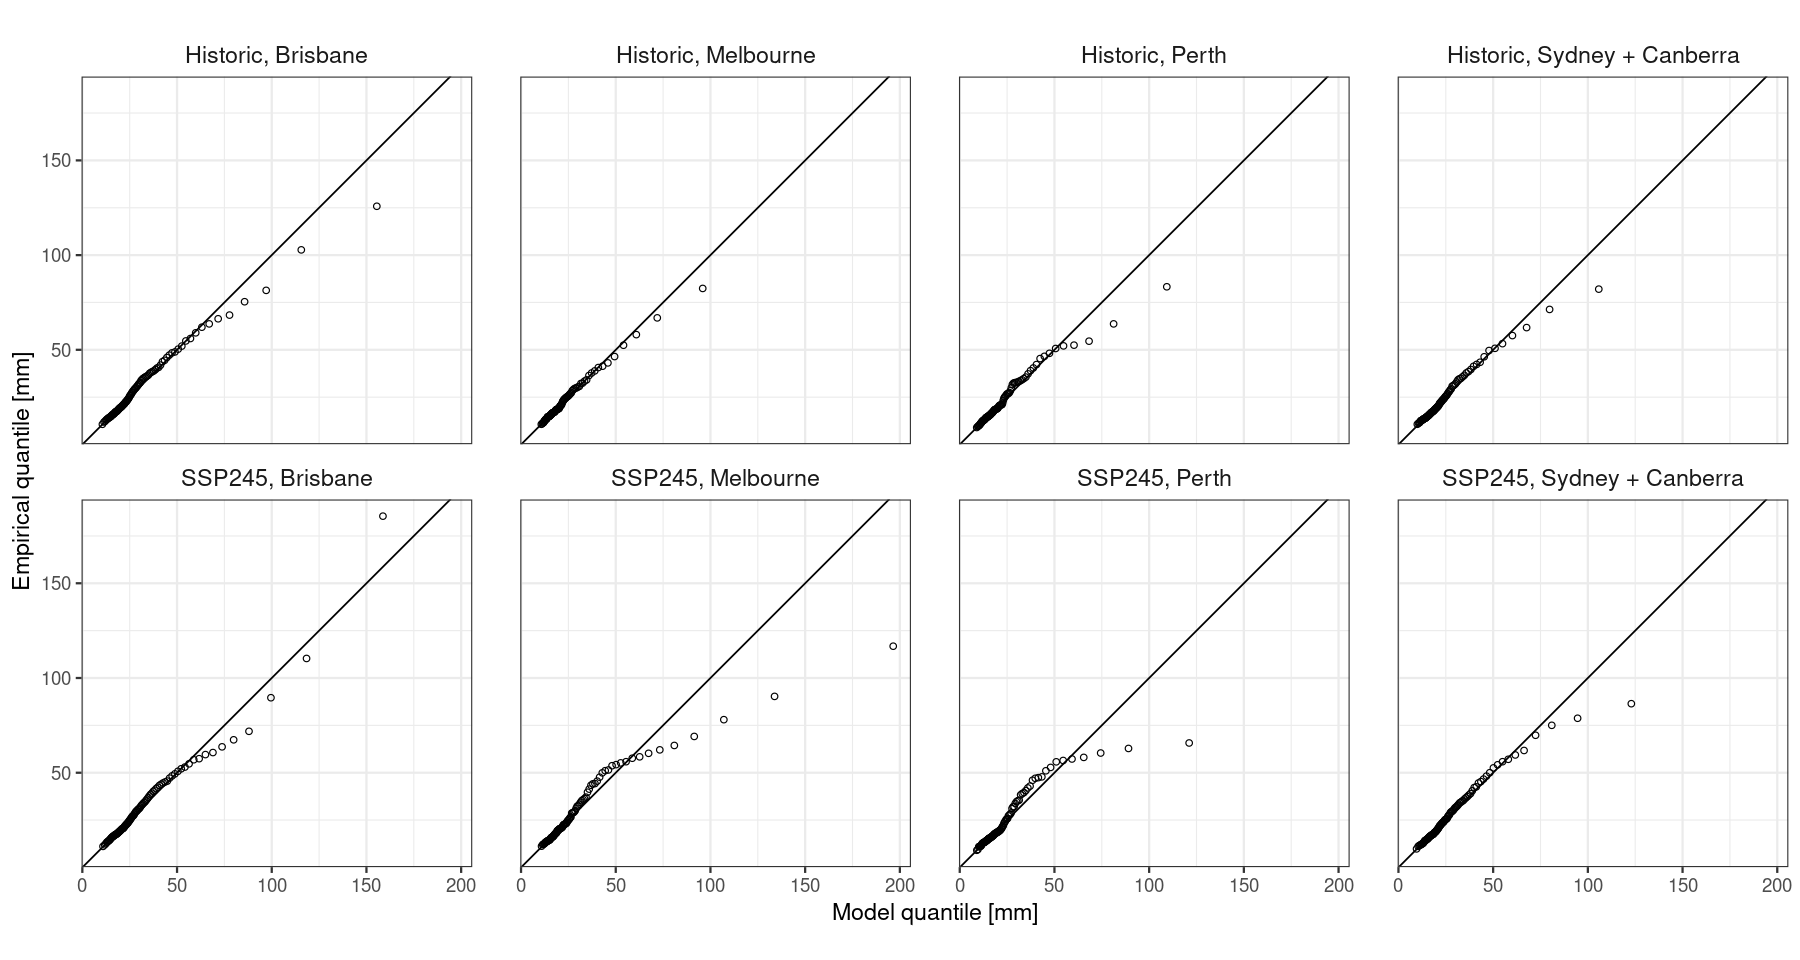

In [49]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_quantiles(gev_fits = gev_fits, var = "hailcast_diam_max", file = "paper/figures/qq_hail.pdf")

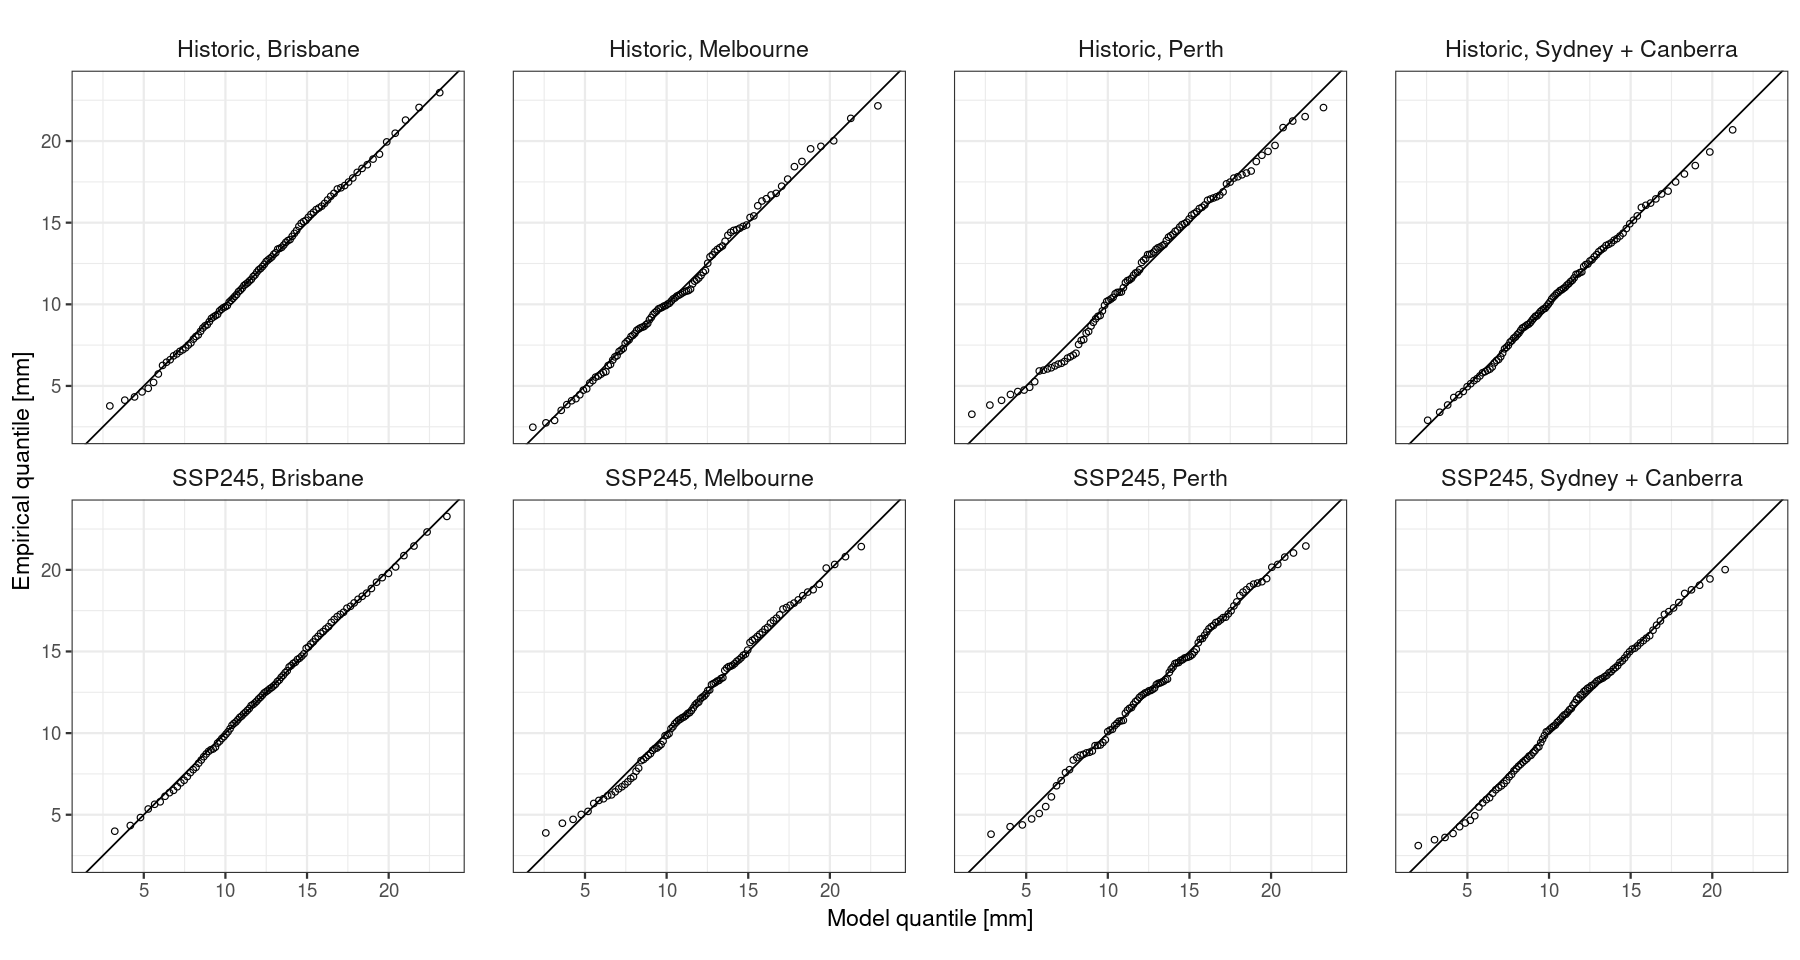

In [50]:
plot_quantiles(gev_fits = gev_fits, var = "wind_10m", file = "paper/figures/qq_wind.pdf")

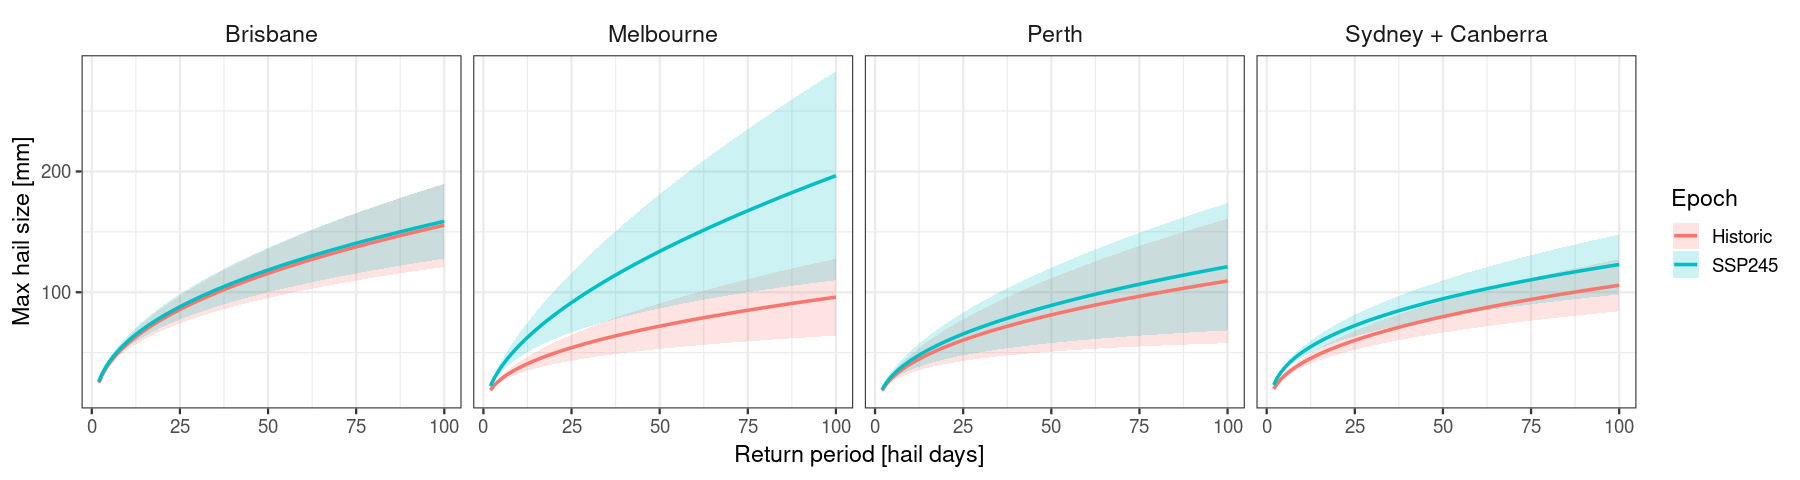

In [51]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_return_levels(gev_fits = gev_fits)

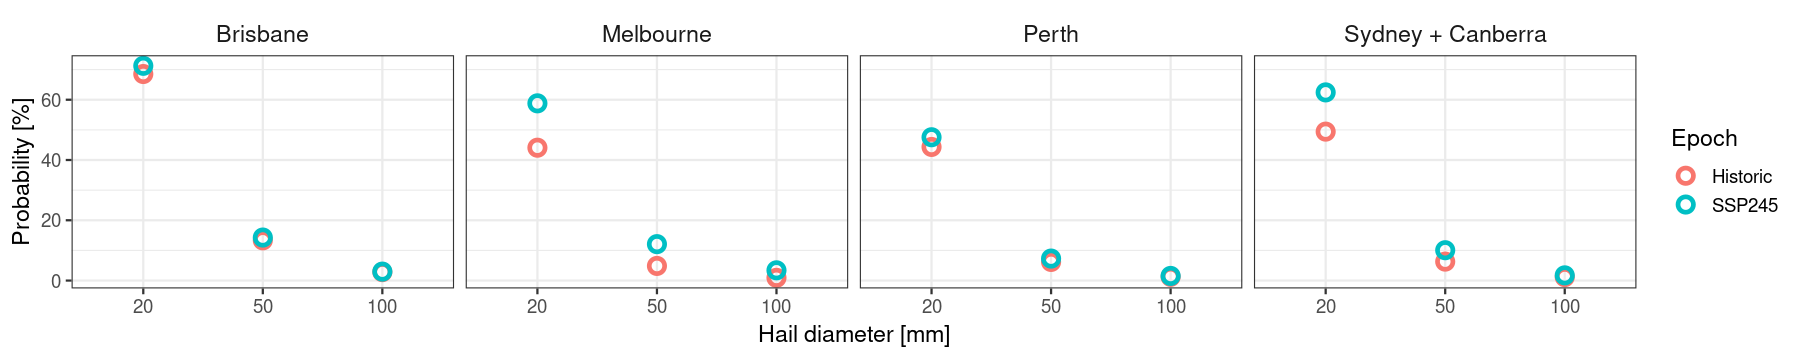

In [52]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_hail_probs(gev_fits = gev_fits)